In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.Age.fillna(data.Age.median(), inplace=True)

### 1 sample T-Test

$H_0$ => Most of the people who boarded the titanic where 35 years old 

$H_a$ => Most of the people who boarded the titanic where 29 years old

1. Try to test the hypothesis with larger numbers
2. Check the significant value
3. If the significant value is less than 5% then reject the null hypothesis and accept the alternative hypothesis
    - When p-value is less than 5% than we call the condition as "Significant"
    - Significant means that the occurs of event is not by chance, it is on-purpose
4. If the $H_0$ find the reason as why it failed

In [5]:
from scipy.stats import ttest_1samp

In [6]:
tstats, pval = ttest_1samp(data.Age.values, 35)
pval

3.724326416969065e-35

**Conclusion**

The above scenario did not occuring by chance. There is pattern behind it.

In [7]:
tstats, pval = ttest_1samp(data.Age.values, 50)
pval

3.394305714212136e-245

In [8]:
tstats, pval = ttest_1samp(data.Age.values, 40)
pval

5.021198736408352e-101

In [9]:
tstats, pval = ttest_1samp(data.Age.values, 29)
pval

0.4073365540820225

In [10]:
data.Age.mean()

29.36158249158249

### 2 sample T-Test

$H_0$ = Age and Fare are not related

$H_a$ = Age and Fare are related

In [11]:
from scipy.stats import ttest_ind

In [12]:
tstat, pval = ttest_ind(data.Age, data.Fare)
pval

0.09876295124022455

**Conclusion**

- The above scenario occured by chance
- They are not significant
- There is no relationship between them

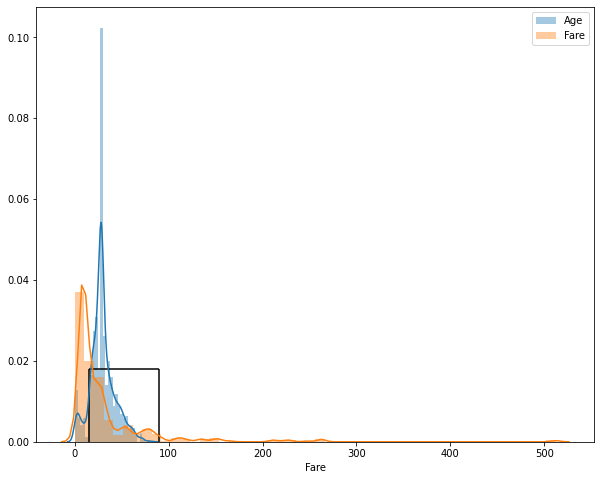

In [13]:
plt.figure(figsize=(10,8))
sns.distplot(data.Age,label='Age')
sns.distplot(data.Fare, label='Fare')

plt.hlines(0.018, 15, 90)
plt.vlines(15, 0, 0.018)
plt.vlines(90, 0, 0.018)
plt.legend()
plt.show()

In [14]:
sample = {}
for i in range(40):
    sample[i] = data[['Age', 'Fare']].sample(n=10)
    _, pval = ttest_ind(sample[i].Age, sample[i].Fare)
    
    if pval<0.05:
        print(i,pval)

2 0.005775163983335524
8 0.00294935772159567
9 0.001536964524929672
32 0.028635401675879423
35 0.01377743348799592
36 0.04606313886025123


In [15]:
sample[1]

,Age,Fare
364,28.0,15.5000
846,28.0,69.5500
394,24.0,16.7000
410,28.0,7.8958
300,28.0,7.7500
760,28.0,14.5000
460,48.0,26.5500
38,18.0,18.0000
609,40.0,153.4625
621,42.0,52.5542


In [16]:
sample[4]

,Age,Fare
855,18.0,9.3500
192,19.0,7.8542
89,24.0,8.0500
335,28.0,7.8958
739,28.0,7.8958
766,28.0,39.6000
438,64.0,263.0000
849,28.0,89.1042
236,44.0,26.0000
747,30.0,13.0000


Once you've rejected the $H_0$, start investigating the reason as to what has led to the rejection of $H_0$. Because we know that this did not happen by chance.

In [17]:
age_list = list([sample[1].Age.mean(), sample[4].Age.mean(), sample[10].Age.mean(),sample[21].Age.mean(), sample[34].Age.mean(),sample[36].Age.mean()])

In [18]:
np.array(age_list).mean()

28.441666666666663

In [19]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [21]:
fare_mean = list([sample[1].Fare.mean(), sample[4].Fare.mean(), sample[10].Fare.mean(),sample[21].Fare.mean(), sample[34].Fare.mean(),sample[36].Fare.mean()])
np.array(fare_mean).mean()




36.21333333333333

In [22]:
sample = {}
new_sample = {}
for i in range(100):
    sample[i] = data[['Age', 'Fare']].sample(n=10)
    _, pval = ttest_ind(sample[i].Age, sample[i].Fare)
    
    if pval<0.05:
        print(i,pval)
        
        new_sample[i] = sample[i]
        
        
    
    

17 0.011921814485286465
25 0.026817986644346006
44 0.0002457833561307666
56 0.03172998566848367
58 0.0004979508692145427
65 0.0024844407511735657
68 0.0015830544677622213
73 0.02968174389644732
74 0.00033278477814046247
81 0.005227668323931582
85 0.02608987656818767


In [23]:
for i in new_sample.keys():
    mean_age = np.array(list([new_sample[i].Age.mean()])).mean()
    mean_fare = np.array(list([new_sample[i].Fare.mean()])).mean()

In [24]:
mean_age, mean_fare

(31.3, 14.611250000000002)

**Conclusion**

When the overall mean calculated for sample means turns out to be around 30 or 31 then the fare tends to be the lowest.  

### ANOVA - Analysis of Variance

ANOVA compares more than 2 numerical datasets without increasing the probability of a false positive.

ANOVA compares the means of independent features

In order to use ANOVA,
1. The samples should be normally distributed (ish)
2. The standard deviations of the data should be similar (ish)
3. The samples should be independent

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


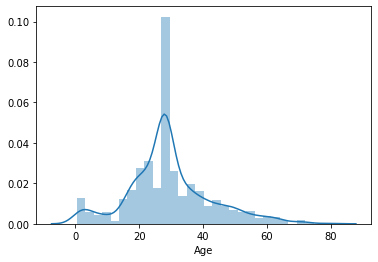

In [26]:
sns.distplot(data.Age)

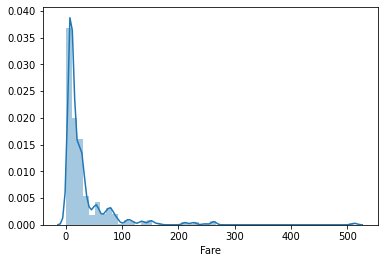

In [27]:
sns.distplot(data.Fare)

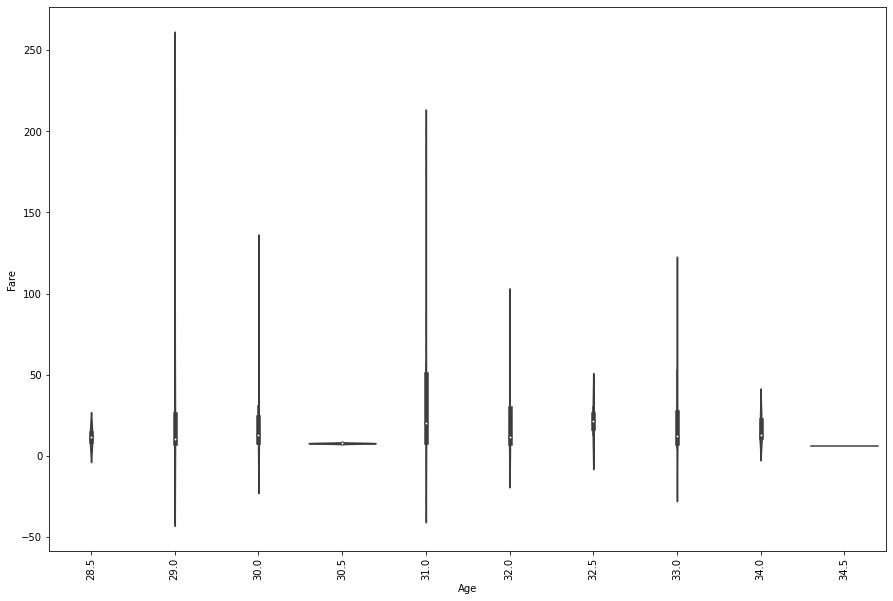

In [28]:
plt.figure(figsize=(15,10))
sns.violinplot(data.loc[(data.Age>28)&(data.Age<35)].Age, data.loc[(data.Age>28)&(data.Age<35)].Fare)
plt.xticks(rotation=90)
plt.show()

In [29]:
from scipy.stats import f_oneway

In [30]:
_, pval = f_oneway(data.loc[(data.Age>28)&(data.Age<35)].Age, data.loc[(data.Age>28)&(data.Age<35)].Fare)

In [31]:
pval

0.0468475326622281

## Chi Square Test

- If we have two or more categorical datasets that we want to compare, we should use a

Chi Square test. It is useful in situations like:
- An A/B test where half of users were shown a green submit button and the other half were shown a purple submit button. Was one group more likely to click the submit button?
- Men and women were both given a survey asking "Which of the following three products is your favorite?" Did the men and women have significantly different preferences?

In [32]:
from scipy.stats import chi2_contingency

In [33]:
data_observed = pd.crosstab(data.Survived, data.Sex)
data_observed

Sex,female,male
Survived,,
0,81,468
1,233,109


In [34]:
chi2, pval, dof, expected = chi2_contingency(data_observed)

In [35]:
pval

1.1973570627755645e-58

**Conclusion**

Both the columns are related to each other.

No handles with labels found to put in legend.


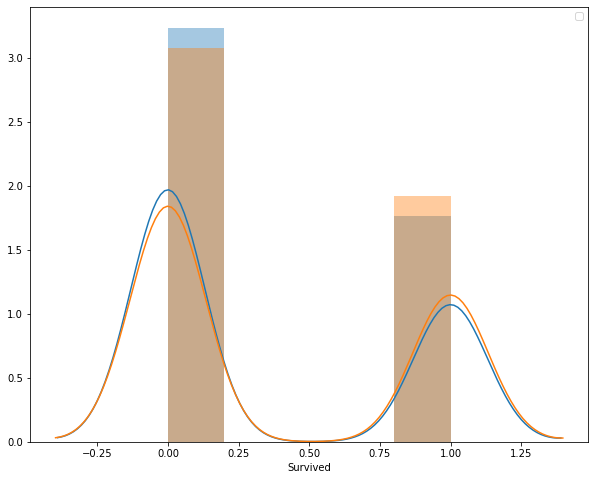

In [36]:
plt.figure(figsize=(10,8))
sns.distplot(data.Sex.map({'male':0, 'female':1}))
sns.distplot(data.Survived)

plt.legend()
plt.show()

In [37]:
df = data[['Sex', 'Pclass', 'Survived']]

In [38]:
df.Sex = df.Sex.map({'male':0, 'female':1})

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
chi2, pval, dof, expected = chi2_contingency(df)

In [40]:
pval

1.0

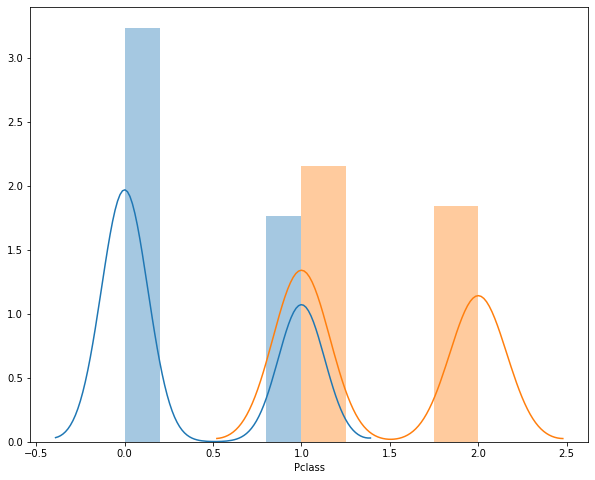

In [64]:
plt.figure(figsize=(10,8))
sns.distplot(data.Sex.map({'male':0, 'female':1}))
# sns.distplot(data.Survived)
sns.distplot(data.loc[data.Pclass <=2].Pclass)

plt.show()

In [42]:
data_observed = pd.crosstab(data.Survived, data.Pclass)
data_observed

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [43]:
chi2, pval, dof, expected = chi2_contingency(data_observed)
pval

4.549251711298793e-23

In [44]:
data_observed = pd.crosstab(data.Sex, data.Pclass)
chi2, pval, dof, expected = chi2_contingency(data_observed)
pval

0.00020638864348233114

In [49]:
Mat = np.array([[1,2],
         [2,4]])

In [56]:
def plot(n):
    sns.distplot(Mat[:,0])
    sns.distplot(Mat[:,1]/n)


In [59]:
from ipywidgets import interactive

In [61]:
interactive(plot, n=[1,2,3])

interactive(children=(Dropdown(description='n', options=(1, 2, 3), value=1), Output()), _dom_classes=('widget-…

In [48]:
np.linalg.inv(Mat)

array([[ 5., -2.],
       [-2.,  1.]])

**Important point**

If the features are derived from another feature than they will overlap at some value. 

# Credit Card Fraud Detection

In [65]:
data = pd.read_csv('data/creditcard.csv')

In [66]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [70]:
fraud = data.loc[data.Class == 1]

In [81]:
_, pval = ttest_ind(fraud.Amount, fraud.Time)
pval

6.059139713839858e-191

In [87]:
_, pval = ttest_ind(fraud.Amount, fraud.V11)
pval

2.0349786943709344e-23

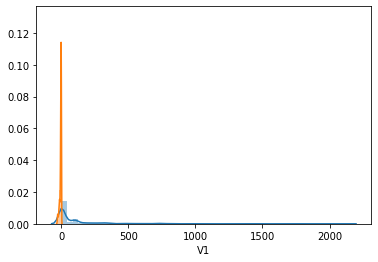

In [90]:
sns.distplot(fraud.Amount, label='Amount')
sns.distplot(fraud.V1, label='V1')

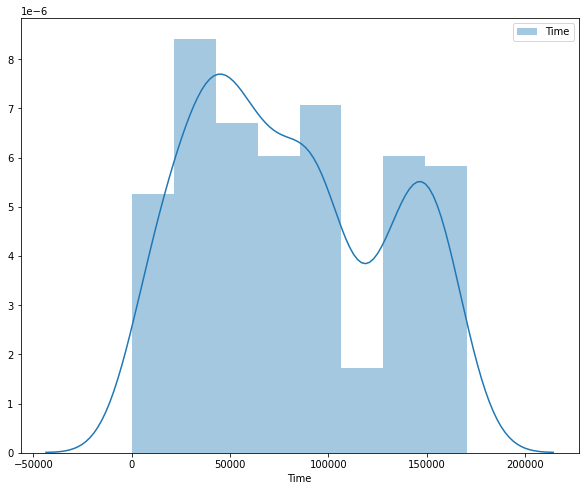

In [96]:
plt.figure(figsize=(10,8))
# sns.distplot(fraud.Amount, label='Amount')
sns.distplot(fraud.Time, label='Time')

# plt.xlim(-10, 100)
plt.legend()

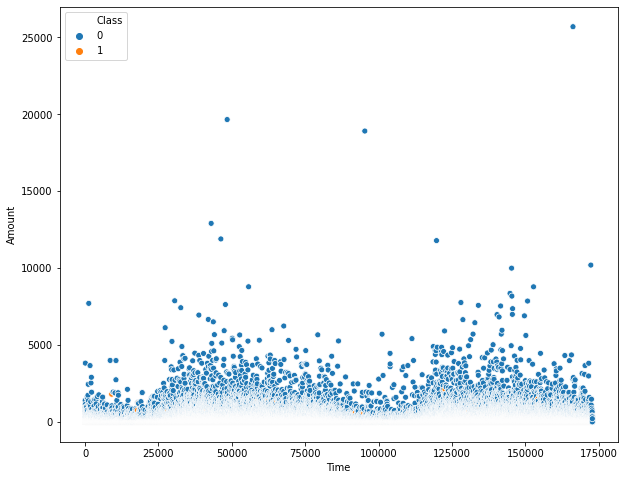

In [100]:
plt.figure(figsize=(10,8))
sns.scatterplot(data.Time, data.Amount, hue=data.Class)

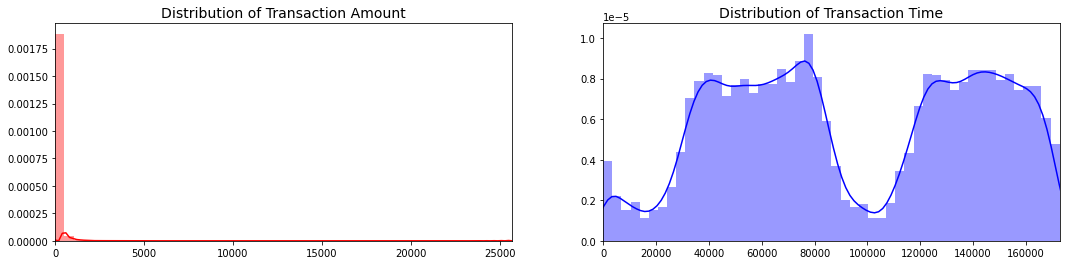

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

## Down-sample

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

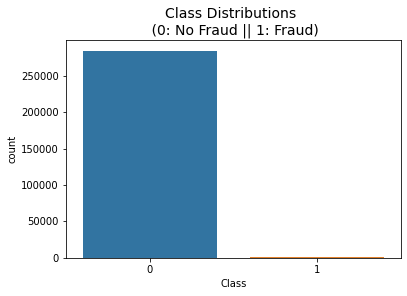

In [107]:
sns.countplot('Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

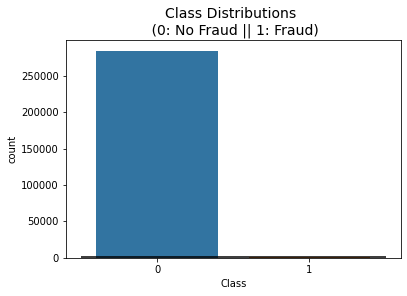

In [111]:
sns.countplot('Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.hlines(len(fraud), -0.5,1.5)

In [113]:
non_fraud = data.loc[data.Class == 0]

In [115]:
non_fraud = non_fraud.sample(n=len(fraud))

In [117]:
df = pd.concat([non_fraud, fraud], axis=0)

In [120]:
df = df.sample(frac=1, random_state=23)

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

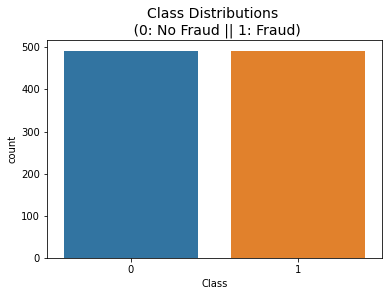

In [121]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Text(0.5, 1.0, 'Original Data || No down sampling')

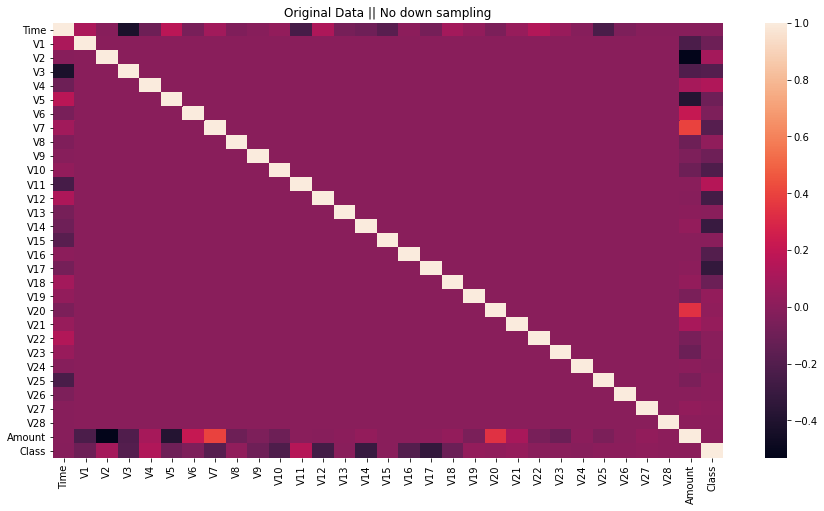

In [125]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr())
plt.title('Original Data || No down sampling')

Text(0.5, 1.0, 'Original Data || Down sampling')

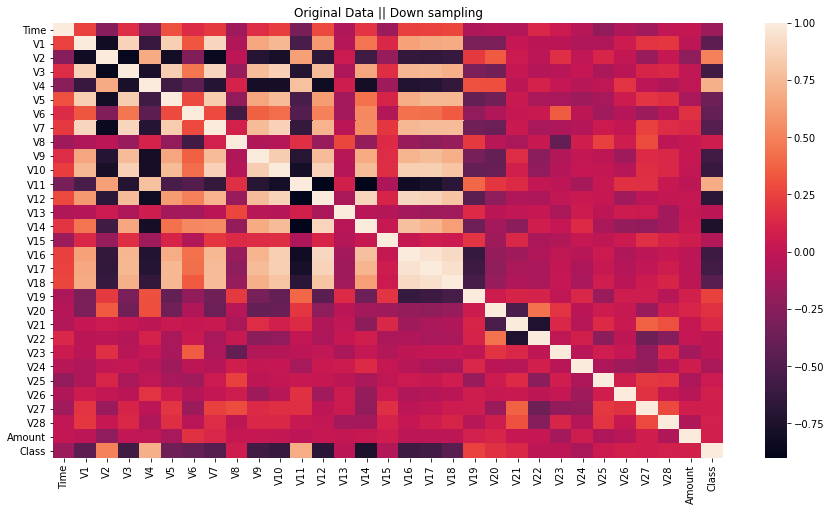

In [126]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())
plt.title('Original Data || Down sampling')

In [127]:
_, pval = ttest_ind(df.Time, df.Amount)
pval

0.0

In [129]:
_, pval = ttest_ind(df.V2, df.V1)
pval

1.7881021122013947e-78

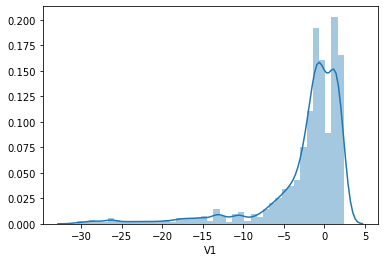

In [130]:
sns.distplot(df.V1)

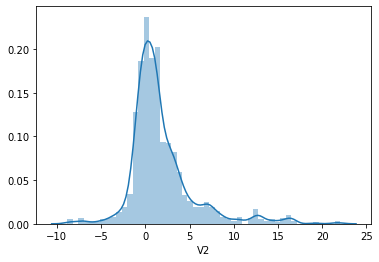

In [133]:
sns.distplot(df.V2)

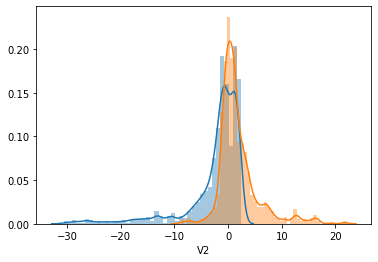

In [132]:
sns.distplot(df.V1)
sns.distplot(df.V2)

In [134]:
_, pval = ttest_ind(df.V2, df.V4)
pval

0.00240501068429468

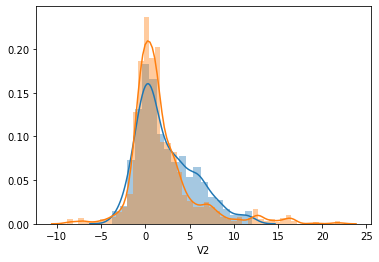

In [135]:
sns.distplot(df.V4)
sns.distplot(df.V2)

In [137]:
_, pval = ttest_ind(df.V18, df.V16)
pval

5.15821764686349e-12

In [139]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,88328.047764,-2.342497,1.801884,-3.475169,2.273956,-1.592916,-0.685871,-2.807492,0.253804,-1.253695,...,0.343367,0.029488,-0.025971,-0.054079,0.010382,0.013491,0.096341,0.039249,103.915152,0.500000
std,47421.857200,5.514821,3.668382,6.227041,3.207318,4.202213,1.767927,5.838842,4.888734,2.347108,...,2.806297,1.185968,1.177500,0.554292,0.656893,0.464725,0.997854,0.416783,222.921040,0.500254
min,406.000000,-30.552380,-8.817740,-31.103685,-3.721428,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.254979,-7.263482,-2.121991,0.000000,0.000000
25%,47898.750000,-2.788129,-0.207878,-5.074851,-0.044240,-1.775001,-1.584860,-3.103817,-0.201331,-2.298358,...,-0.178095,-0.525914,-0.245571,-0.401705,-0.323628,-0.273980,-0.059328,-0.057915,1.262500,0.000000
50%,81389.500000,-0.763820,0.940617,-1.268494,1.330096,-0.540605,-0.635421,-0.712137,0.142806,-0.688119,...,0.158002,0.041970,-0.031591,0.008212,0.044190,-0.046845,0.052503,0.035469,17.030000,0.500000
75%,132681.250000,1.067975,2.777569,0.347876,4.250632,0.455450,0.059238,0.229064,0.848057,0.232639,...,0.644337,0.615325,0.197996,0.371157,0.378876,0.282968,0.455031,0.219773,99.990000,1.000000
max,172682.000000,2.390674,22.057729,3.492620,12.114672,11.095089,8.755152,5.802537,20.007208,5.138236,...,27.202839,8.361985,5.466230,1.194373,2.239120,2.745261,3.052358,1.779364,2125.870000,1.000000


In [ ]:
sample = {}
newsample = {}
for i in range(10000):
    sample[i] = df.sample(n=10)
    _, pval = ttest_ind(sample[i].Time, sample[i].Amount)
    
    if pval>0.05:
        print(i, pval)
        newsample[i] = sample[i]